# Code 6. Practice: Graph Basic & PageRank

앞서 배운 그래프 기초와 페이지랭크에 대한 자세한 실습 코드입니다.

In [1]:
import os
import sys

import time
from collections import defaultdict
from typing import DefaultDict, Dict, Set, TextIO, Tuple, Union, List

import numpy as np
from typing import DefaultDict, Dict, Set, TextIO, Tuple, Union, List

from abc import *

In [3]:
###################################################
#   Abstract Graph class                          #
#                                                 #
###################################################
class DiGraph(metaclass=ABCMeta):
    
    @abstractmethod
    def __str__(self):
        pass
    
    @abstractmethod
    def nodes(self) -> Set[int]:
        pass

    @abstractmethod
    def edges(self) -> List[Tuple[int, int]]:
        pass
    
    @abstractmethod
    def add_vertex(self, v: int) -> None:
        pass
    
    @abstractmethod
    def remove_vertex(self, v: int) -> None:
        pass

    @abstractmethod
    def add_edge(self, src: int, dst: int) -> None:
        pass

    @abstractmethod
    def remove_edge(self, src: int, dst: int) -> None:
        pass

    @abstractmethod
    def out_neighbor(self, v: int):
        pass

    @abstractmethod
    def out_degree(self, v: int) -> int:
        pass

    @abstractmethod
    def has_edge(self, src: int, dst: int) -> bool:
        pass


# **Homework 1-1**

TODO : Implement following methods for graph network                                 
- edges()               : return list of edges [e1, e2, ...]               
- add_vertex(v)         : add vertex v 
- remove_vertex(v)      : remove vertex v 
- add_edge(src, dst)    : add edge from one vertex(src) to another(dst)             
- remove_edge(src, dst) : remove edge from src to dst                               
- out_neighbor(v)       : get neighbors of vertex(v)                                
- out_degree(v)         : get the number of edges from vertex v                     
- has_edge(src, dst)    : return True if the edge (src, dst) is in the graph       

In [5]:
###################################################
#   Dictionary Array Graph                        #
#    - 정점       : self._nodes                   #             
#    - 나가는간선 : self._out_neighbor            #
#                                                 #
###################################################
class Graph_dict(DiGraph):

    def __init__(self) -> None:
        self._nodes = set()
        self._out_neighbor = defaultdict(set)

    def __str__(self):
        result = ""
        for v in self._nodes:
            neighbors = self._out_neighbor[v]
            if not neighbors:
                result = result + str(v) + " : empty\n"
            else : result = result + str(v) + " : " +  str(neighbors) + "\n"
        return result
    
    def nodes(self) -> Set[int]:
        return self._nodes

    def edges(self) -> List[Tuple[int, int]]:
        edges = []
        for v1 in self._nodes:
            neighbors = self._out_neighbor[v1]
            for v2 in neighbors:
                edges.append((v1, v2))
        return edges

    def adjacent(self, v) -> Set[int]:
        adj = set()
        for edge in self.edges():
            if v in edge:
                adj.add(edge)

        return adj

    ################# Write your answer here #####################
    def add_vertex(self, v: int) -> None:
        return self._nodes.add(v)

    ################# Write your answer here #####################
    def remove_vertex(self, v: int) -> None:
        if len(self._nodes) == 0:
            return
        else:
            self._nodes.remove(v)
            for u, v in self.adjacent(v):
                self.remove_edge(u, v)

    def add_edge(self, src: int, dst: int) -> None:
        self.add_vertex(src)
        self.add_vertex(dst)
        self._out_neighbor[src].add(dst)

    def remove_edge(self, src: int, dst: int) -> None:
        neighbor = self.out_neighbor(src)
        if dst in neighbor:
            self._out_neighbor[src].remove(dst)

    ################# Write your answer here #####################
    def out_neighbor(self, v: int) -> Set[int]:
        return self._out_neighbor[v]
    
    ################# Write your answer here #####################
    def out_degree(self, v: int) -> int:
        return len(self._out_neighbor[v])
    
    def has_edge(self, src: int, dst: int) -> bool:
        return dst in self._out_neighbor[src]
    
    ################# Write your answer here #####################
    # HW 1-2
    def subgraph(self, vertices: List[int]):
        subgraph = Graph_dict()
        for v in vertices:
            subgraph.add_vertex(v)
        for v1 in vertices:
            for v2 in vertices:
                if self.has_edge(v1, v2):
                    subgraph.add_edge(v1, v2)
        return subgraph

In [6]:
###################################################
#   Numpy Array Graph                             #
#    - 정점     : self._nodes                     #
#    - 간선     : self._data                      #
#    - max_size : self._max_size                  #
#                                                 #
###################################################
class Graph_numpy_array(DiGraph):
    def __init__(self, size: int) -> None:
        self._data = np.zeros((size, size))
        self._max_size = size
        self._nodes = set()

    def __str__(self):
        return str(self._data)
    
    def nodes(self) -> Set[int]:
        return self._nodes

    def edges(self) -> List[Tuple[int, int]]:
        edge_list = []
        for i in range(self._max_size):
            for j in range(self._max_size):
                if self._data[i][j] == 1:
                    edge_list.append((i, j))
        return edge_list

    def add_vertex(self, v: int) -> None:
        if v >= 0 and v < self._max_size:
            self._nodes.add(v)
        else:
            print("Error : vertex number is in the out of range")
    
    def remove_vertex(self, v: int) -> None:
        if v >= 0 and v < self._max_size:
            self._nodes.remove(v)
            self._data[v, :] = 0
            self._data[:, v] = 0
        else :
            print("Error : vertex number is in the out of range")

    ################# Write your answer here #####################
    def add_edge(self, src: int, dst: int) -> None:
        self.add_vertex(src)
        self.add_vertex(dst)      
        self._data[src][dst] = 1

    ################# Write your answer here #####################
    def remove_edge(self, src: int, dst: int) -> None:
        self._data[src][dst] = 0


    def out_neighbor(self, v: int) -> Set[int]:
        return {x for x in range(self._max_size) if self._data[v][x] == 1}

    def out_degree(self, v: int) -> int:
        return len(self.out_neighbor(v))
    
    ################# Write your answer here #####################
    def has_edge(self, src: int, dst: int) -> bool:
        return self._data[src][dst] == 1

    def subgraph(self, vertices: List[int]):
        subgraph = Graph_numpy_array(self._max_size) 
        for v in vertices:
            subgraph.add_vertex(v)
        for v1 in vertices:
            for v2 in vertices:
                if self.has_edge(v1, v2):
                    subgraph.add_edge(v1, v2)
        return subgraph

In [7]:
from queue import PriorityQueue
from typing import DefaultDict
from collections import defaultdict
import math

# Breath First Search algorithm
def shortest_path_from(G: DiGraph, src: int) -> defaultdict(int):
    queue = []
    visited = {v: False for v in G.nodes()}
    distance = {v: float('inf') for v in G.nodes()}
    visited[src] = True
    distance[src] = 0
    queue.append(src)
    
    while (len(queue) != 0):
        v = queue.pop(0)
        neighbors = G.out_neighbor(v)
        for u in G.out_neighbor(v):
            if visited[u] is False:
                visited[u] = True
                distance[u] = distance[v] + 1
                queue.append(u)
    return distance

# **Test script for homework 1-1**

You must pass all of following assertions

In [10]:
graph_dict = Graph_dict()
graph_numpy_array = Graph_numpy_array(10)

# Test 1 : vertex addition
graph_dict.add_vertex(1)
graph_dict.add_vertex(3)
graph_numpy_array.add_vertex(1)
graph_numpy_array.add_vertex(3)
assert graph_dict.nodes() == {1, 3}
assert graph_numpy_array.nodes() == {1, 3}
print('-' * 20, 'TEST 1 PASSED !', '-' * 20)

# Test 2 : edge addition & has_edge
graph_dict.add_edge(1, 3)
graph_dict.add_edge(1, 2)
graph_dict.add_edge(2, 3)
graph_numpy_array.add_edge(1, 3)
graph_numpy_array.add_edge(1, 2)
graph_numpy_array.add_edge(2, 3)
node = graph_dict.nodes()

assert graph_dict.edges() == [(1, 2), (1, 3), (2, 3)]
assert graph_numpy_array.edges() == [(1, 2), (1, 3), (2, 3)]
assert graph_dict.has_edge(1, 2) == True
assert graph_numpy_array.has_edge(1, 2) == True
assert graph_dict.has_edge(3, 1) == False
assert graph_numpy_array.has_edge(3, 1) == False
print('-' * 20, 'TEST 2 PASSED !', '-' * 20)

# Test 3 : duplicated edges
graph_dict.add_edge(1, 3)
graph_numpy_array.add_edge(1, 3)

assert graph_dict.edges() == [(1, 2), (1, 3), (2, 3)]
assert graph_numpy_array.edges() == [(1, 2), (1, 3), (2, 3)]

graph_dict.add_edge(5, 9)
graph_numpy_array.add_edge(5, 9)
assert graph_dict.edges() == [(1, 2), (1, 3), (2, 3), (5, 9)]
assert graph_numpy_array.edges() == [(1, 2), (1, 3), (2, 3), (5, 9)]
print('-' * 20, 'TEST 3 PASSED !', '-' * 20)

# Test 4 : remove vertex
graph_dict.remove_vertex(2)
graph_numpy_array.remove_vertex(2)

assert graph_dict.nodes() == {1, 3, 5, 9}
assert graph_numpy_array.nodes() == {1, 3, 5, 9}
assert graph_dict.edges() == [(1, 3), (5, 9)]
assert graph_numpy_array.edges() == [(1, 3), (5, 9)]
print('-' * 20, 'TEST 4 PASSED !', '-' * 20)

# Test 5 : remove edge
graph_dict.add_edge(2, 3)
graph_dict.remove_edge(2, 3)
graph_numpy_array.add_edge(2, 3)
graph_numpy_array.remove_edge(2, 3)

assert graph_dict.has_edge(2, 3) == False
assert graph_numpy_array.has_edge(2, 3) == False
print('-' * 20, 'TEST 5 PASSED !', '-' * 20)

# Test 6 : neighborhood
graph_dict.add_edge(1, 4)
graph_dict.add_edge(1, 2)
graph_numpy_array.add_edge(1, 4)
graph_numpy_array.add_edge(1, 2)

assert graph_dict.out_neighbor(1) == {2, 3, 4}
assert graph_numpy_array.out_neighbor(1) == {2, 3, 4}

assert graph_dict.out_degree(1) == 3
assert graph_dict.out_degree(1) == 3
print('-' * 20, 'TEST 6 PASSED !', '-' * 20)

# Test 7 : shortest path

data = 'graph/hw/hw1/random.txt'
graph_dict = Graph_dict()
graph_numpy_array = Graph_numpy_array(100)
f = open(data)
for line in f:
    v1, v2 = map(int, line.split())
    graph_dict.add_edge(v1, v2)
    graph_numpy_array.add_edge(v1, v2)

dist_dict = shortest_path_from(graph_dict, 1)
dist_numpy = shortest_path_from(graph_numpy_array, 1)

for key in dist_dict.keys():
	assert dist_dict[key] == dist_numpy[key]

assert dist_dict[1] == 0
assert dist_dict[17] == 2
assert dist_dict[16] == 4
assert dist_dict[30] == 3
print('-' * 20, 'TEST 7 PASSED !', '-' * 20)

-------------------- TEST 1 PASSED ! --------------------
-------------------- TEST 2 PASSED ! --------------------
-------------------- TEST 3 PASSED ! --------------------
-------------------- TEST 4 PASSED ! --------------------
-------------------- TEST 5 PASSED ! --------------------
-------------------- TEST 6 PASSED ! --------------------
-------------------- TEST 7 PASSED ! --------------------


# **Homework 1-2**
                                                                    
TODO : Implement following methods for pagerank algorithm                           
1) Graph_dict   
First, you implement subgraph methods in the graph_dict class 

- subgraph(vertices) : get the induced subgraph containing the nodes and edges

2) pagerank(graph, damping_factor, maxiters, tol)   

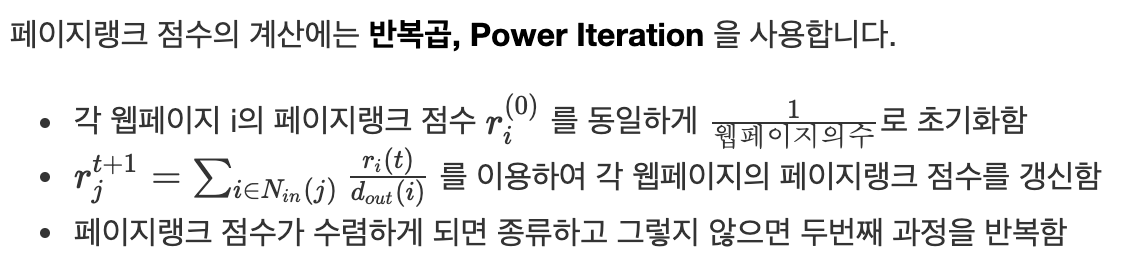

In [12]:
# Compute the distance between two dictionaries based on L1 norm
def l1_distance(x: DefaultDict[int, float], y: DefaultDict[int, float]) -> float:
    err: float = 0.0
    for k in x.keys():
        err += abs(x[k] - y[k])
    return err

################################################################################
# Run the pagerank algorithm iteratively using the graph_dict                  #
#  parameters                                                                  #
#    - graph : Directed graph (graph_dict object)                              #
#    - damping_factor : Damping factor                                         #
#    - maxiters : The maximum number of iterations                             #
#    - tol : Tolerance threshold to check the convergence                      #
################################################################################
def pagerank(
    graph: Graph_dict,
    damping_factor: float,
    maxiters: int,
    tol: float,
) -> Dict[int, float]:
    vec: DefaultDict[int, float] = defaultdict(float)  # Pagerank vector
    

    ############### TODO: Implement the pagerank algorithm #####################    

    # 가중치 초기화
    N = len(graph.nodes())
    vec = {node : 1 / N for node in graph.nodes()}

    for n in range(maxiters):
        S = 0
        new_vec: DefaultDict[int, float] = defaultdict(float)

        for src, dst in graph.edges():
            new_vec[dst] += damping_factor * vec[src] / graph.out_degree(src)

        S = sum(new_vec.values())

        for node in graph.nodes():
            new_vec[node] += (1 - S) * (1/N)

        #### Check the convergence ###

        # Stop the iteration if L1norm[PR(t) - PR(t-1)] < tol
        delta: float = 0.0
        delta = l1_distance(new_vec, vec)

        print(f"[Iter {n}]\tDelta = {delta}")

        if delta < tol:
            break

        vec = new_vec

    ########################### Implementation end #############################

    return dict(vec)

You can test your pagerank algorithm using following code. (same as lab3)

In [14]:
G = Graph_dict()
path_v2n = 'graph/others/vertex2name.txt'
path_edges = 'graph/others/edges.txt'

# keyword : deep_learning.txt (딥러닝), lee.txt (이순신), bong.txt(봉준호)
path_keyword = 'graph/hw/hw1/deep_learning.txt'

f = open(path_edges)
for line in f:
    v1, v2 = map(int, line.split())
    G.add_edge(v1, v2)                                                 
                                 
n2v = {}
v2n = {}
f = open(path_v2n, encoding='UTF8')
for line in f:
    v, n = line.split()
    v = int(v)
    n = n.rstrip()
    n2v[n] = v
    v2n[v] = n

node_key = []
f = open(path_keyword)
for line in f:
    v = line.rstrip()
    v = int(v)
    node_key.append(v)

H = G.subgraph(node_key)

print("###### PageRank Algorithm ######")
pr = pagerank(H, damping_factor = 0.9 , maxiters = 100, tol = 1e-06)
res = [key for (key, value) in sorted(pr.items(), key=lambda x:x[1], reverse=True)]
res_value = [value for (key, value) in sorted(pr.items(), key=lambda x:x[1], reverse=True)]
for item in res[:10]:
    print(v2n[item])


''' 
Expected Output (solution) 

###### PageRank Algorithm ######
[Iter 0]	Delta = 0.2556213017751478
[Iter 1]	Delta = 0.03539371870732816
[Iter 2]	Delta = 0.004900668744091563
[Iter 3]	Delta = 0.0006785541337973044
[Iter 4]	Delta = 9.395364929493111e-05
[Iter 5]	Delta = 1.3008966825434065e-05
[Iter 6]	Delta = 1.8012415605173082e-06
[Iter 7]	Delta = 2.494026775656799e-07
딥러닝
PyTorch
OpenCV
라온피플
이스트소프트
인공지능인문학
자동긴급제동장치
케플러-90i
T2d
심심이
'''


###### PageRank Algorithm ######
[Iter 0]	Delta = 0.596449704142012
[Iter 1]	Delta = 0.24775603095129722
[Iter 2]	Delta = 0.10291404362592332
[Iter 3]	Delta = 0.042748910429229736
[Iter 4]	Delta = 0.017757239716757037
[Iter 5]	Delta = 0.007376084190037546
[Iter 6]	Delta = 0.003063911894323368
[Iter 7]	Delta = 0.0012727018637958137
[Iter 8]	Delta = 0.0005286607741920579
[Iter 9]	Delta = 0.0002195975523568705
[Iter 10]	Delta = 9.121744482500083e-05
[Iter 11]	Delta = 3.789032323495145e-05
[Iter 12]	Delta = 1.573905734375547e-05
[Iter 13]	Delta = 6.537762281225157e-06
[Iter 14]	Delta = 2.71568587049964e-06
[Iter 15]	Delta = 1.128054131022127e-06
[Iter 16]	Delta = 4.6857633133334797e-07
딥러닝
OpenCV
이스트소프트
인공지능인문학
미분기하학
PyTorch
라온피플
자동긴급제동장치
케플러-90i
T2d


' \nExpected Output (solution) \n\n###### PageRank Algorithm ######\n[Iter 0]\tDelta = 0.2556213017751478\n[Iter 1]\tDelta = 0.03539371870732816\n[Iter 2]\tDelta = 0.004900668744091563\n[Iter 3]\tDelta = 0.0006785541337973044\n[Iter 4]\tDelta = 9.395364929493111e-05\n[Iter 5]\tDelta = 1.3008966825434065e-05\n[Iter 6]\tDelta = 1.8012415605173082e-06\n[Iter 7]\tDelta = 2.494026775656799e-07\n딥러닝\nPyTorch\nOpenCV\n라온피플\n이스트소프트\n인공지능인문학\n자동긴급제동장치\n케플러-90i\nT2d\n심심이\n'

# **Test script for homework 1-2**

In [16]:
# Test 1 : subgraph
import networkx as nx

G = Graph_dict()
G2 = Graph_numpy_array(100)
for i in range(0, 10):
    G.add_edge(i, i+1)
    G2.add_edge(i, i+1)

H = G.subgraph([1, 2, 3, 4, 5])
H2 = G2.subgraph([1, 2, 3, 4, 5])
assert H.edges() == [(1, 2), (2, 3), (3, 4), (4, 5)]
assert H.edges() == H2.edges()

H = G.subgraph([1, 3, 5])
H2 = G2.subgraph([1, 3, 5])
assert H.edges() == []
assert H.edges() == H2.edges()

H = G.subgraph(G.nodes())
H2 = G2.subgraph(G.nodes())
assert H.edges() == [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10)]
assert H.edges() == H2.edges()
assert H.edges() == G.edges()

# Test 2 : PageRank
G = Graph_dict()
G_nx = nx.DiGraph()
data = 'graph/hw/hw1/ego-facebook.txt'

f = open(data)
for line in f:
    v1, v2 = map(int, line.split())
    G.add_edge(v1, v2)
    G_nx.add_edge(v1, v2)


pr = nx.pagerank(G_nx, alpha = 0.9)
nx_res = [key for (key, value) in sorted(pr.items(), key=lambda x:x[1], reverse=True)]


pr = pagerank(G, damping_factor = 0.9, maxiters = 100, tol = 1e-06)
our_res = [key for (key, value) in sorted(pr.items(), key=lambda x:x[1], reverse=True)]

assert nx_res[:10] == our_res[:10]


'''
Expected output

[Iter 0]	Delta = 0.698921186626955
[Iter 1]	Delta = 0.3389690628171277
[Iter 2]	Delta = 0.17288562623997814
[Iter 3]	Delta = 0.09077429613251603
[Iter 4]	Delta = 0.04646162762095549
[Iter 5]	Delta = 0.022900195846917264
[Iter 6]	Delta = 0.011861585170685194
[Iter 7]	Delta = 0.006383508296346828
[Iter 8]	Delta = 0.0032048867134547676
[Iter 9]	Delta = 0.0015812728529011953
[Iter 10]	Delta = 0.000850118589198698
[Iter 11]	Delta = 0.0004365949887159213
[Iter 12]	Delta = 0.00021339393793977216
[Iter 13]	Delta = 0.0001085382627142086
[Iter 14]	Delta = 5.853815016438714e-05
[Iter 15]	Delta = 2.9449618139342482e-05
[Iter 16]	Delta = 1.4482341812984927e-05
[Iter 17]	Delta = 7.728298696144863e-06
[Iter 18]	Delta = 3.9759243921904535e-06
[Iter 19]	Delta = 1.9449675092040128e-06
[Iter 20]	Delta = 9.89687162248964e-07

'''

[Iter 0]	Delta = 0.698921186626955
[Iter 1]	Delta = 0.3389690628171277
[Iter 2]	Delta = 0.17288562623997814
[Iter 3]	Delta = 0.09077429613251603
[Iter 4]	Delta = 0.04646162762095549
[Iter 5]	Delta = 0.022900195846917264
[Iter 6]	Delta = 0.011861585170685194
[Iter 7]	Delta = 0.006383508296346828
[Iter 8]	Delta = 0.0032048867134547676
[Iter 9]	Delta = 0.0015812728529011953
[Iter 10]	Delta = 0.000850118589198698
[Iter 11]	Delta = 0.0004365949887159213
[Iter 12]	Delta = 0.00021339393793977216
[Iter 13]	Delta = 0.0001085382627142086
[Iter 14]	Delta = 5.853815016438714e-05
[Iter 15]	Delta = 2.9449618139342482e-05
[Iter 16]	Delta = 1.4482341812984927e-05
[Iter 17]	Delta = 7.728298696144863e-06
[Iter 18]	Delta = 3.9759243921904535e-06
[Iter 19]	Delta = 1.9449675092040128e-06
[Iter 20]	Delta = 9.89687162248964e-07


'\nExpected output\n\n[Iter 0]\tDelta = 0.698921186626955\n[Iter 1]\tDelta = 0.3389690628171277\n[Iter 2]\tDelta = 0.17288562623997814\n[Iter 3]\tDelta = 0.09077429613251603\n[Iter 4]\tDelta = 0.04646162762095549\n[Iter 5]\tDelta = 0.022900195846917264\n[Iter 6]\tDelta = 0.011861585170685194\n[Iter 7]\tDelta = 0.006383508296346828\n[Iter 8]\tDelta = 0.0032048867134547676\n[Iter 9]\tDelta = 0.0015812728529011953\n[Iter 10]\tDelta = 0.000850118589198698\n[Iter 11]\tDelta = 0.0004365949887159213\n[Iter 12]\tDelta = 0.00021339393793977216\n[Iter 13]\tDelta = 0.0001085382627142086\n[Iter 14]\tDelta = 5.853815016438714e-05\n[Iter 15]\tDelta = 2.9449618139342482e-05\n[Iter 16]\tDelta = 1.4482341812984927e-05\n[Iter 17]\tDelta = 7.728298696144863e-06\n[Iter 18]\tDelta = 3.9759243921904535e-06\n[Iter 19]\tDelta = 1.9449675092040128e-06\n[Iter 20]\tDelta = 9.89687162248964e-07\n\n'